In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("weight_height_24.csv")

In [4]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [6]:
df.shape

(24, 2)

In [7]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [12]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])

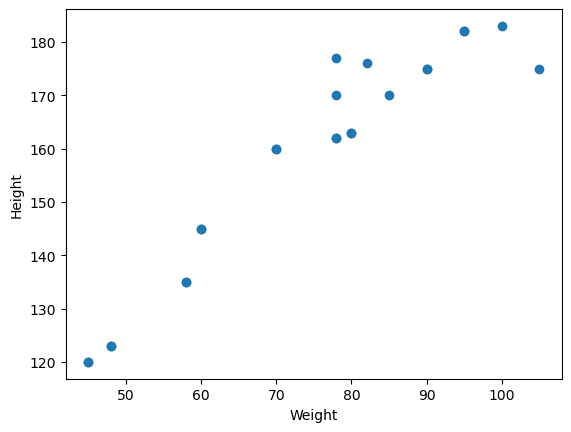

In [15]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [16]:
df.corr()

,Weight,Height
Weight,1.000000,0.952822
Height,0.952822,1.000000


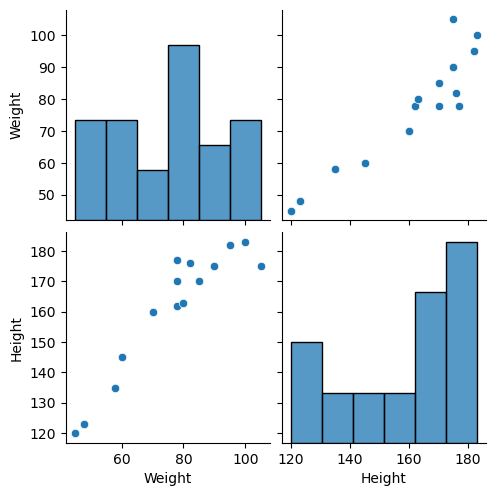

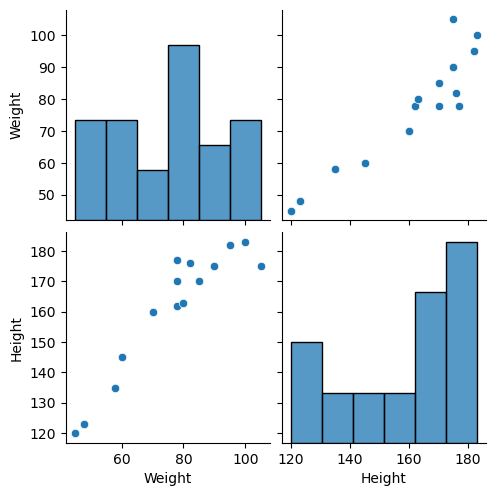

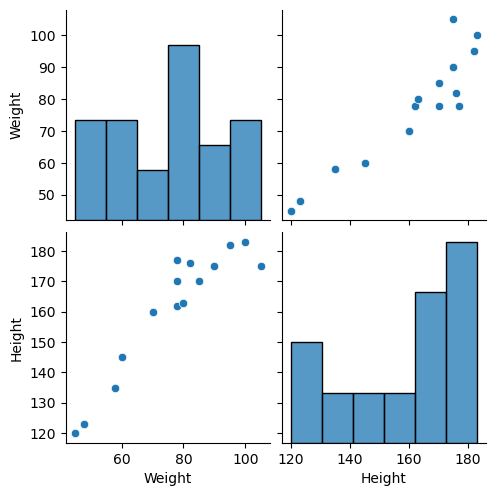

In [19]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [20]:
#independent and depentend feature
X = df[["Weight"]]  # independent feature have to in dataframe or in 2D 
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [21]:
X.shape

(24, 1)

In [22]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [23]:
Y = df["Height"] # Dependent feature can be series cause its only one column this one can be series  or 1D array

In [24]:
Y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    120
17    135
18    123
19    145
20    160
21    162
22    163
23    175
Name: Height, dtype: int64

In [26]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)

In [28]:
X_train.shape

(18, 1)

In [29]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [33]:
X_test =scaler.transform(X_test)

In [34]:
X_test

array([[ 1.26936384],
       [-2.09071692],
       [-2.09071692],
       [-1.88911207],
       [ 1.26936384],
       [ 0.12693638]])

In [36]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression


In [37]:
regression = LinearRegression()

In [39]:
regression.fit(X_train,y_train)

LinearRegression()

In [42]:
print("Slope value is: " ,regression.coef_)
print("Intercept: " ,regression.intercept_)

Slope value is:  [15.21203971]
Intercept:  160.22222222222223


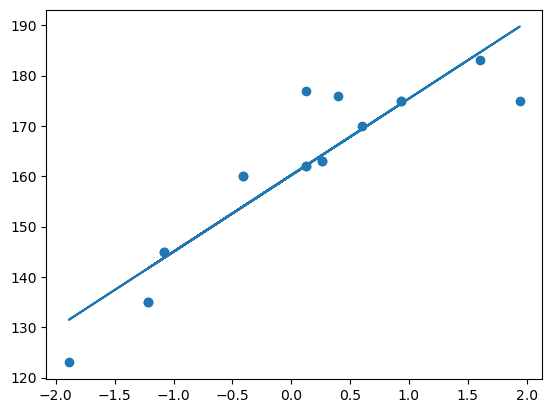

In [43]:
# Plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train))
plt.show()

In [44]:
# Prediction for test data 
y_pred = regression.predict(X_test)

In [47]:
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

47.91360093993654
6.350737808504296
6.921965106812988


In [52]:
#R scuared
from sklearn.metrics import r2_score

In [51]:
score = r2_score(y_test,y_pred)
print(score)

0.9422205596141857


In [53]:
# display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9277756995177322

In [54]:
#OlS Linear Regression
import statsmodels.api as sm

In [55]:
model = sm.OLS(y_train,X_train).fit()

In [56]:
prediction= model.predict(X_test)
print(prediction)

[ 19.30961319 -31.80406879 -31.80406879 -28.73724787  19.30961319
   1.93096132]


In [58]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.1530
Date:                Tue, 09 Sep 2025   Prob (F-statistic):                       0.701
Time:                        22:30:18   Log-Likelihood:                         -116.93
No. Observations:                  18   AIC:                                      235.9
Df Residuals:                      17   BIC:                                      236.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\somra\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [59]:
#Prediction For new data
regression.predict([[72]])

array([1255.48908122])